# Capstone -Sentiment Based Product Recommendation System

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.
As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In [4]:
#importing necessary packages
import pandas as pd
import numpy as np
import re,string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
from nltk.corpus import wordnet
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('stopwords')

C:\Users\dell\Anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Data sourcing and sentiment analysis

In [5]:
# loading datasets
df_review=pd.read_csv("sample30.csv")

In [6]:
df_review.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [7]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# checking number of rows and columns
df_review.shape

(30000, 15)

In [9]:
# checking missing values
df_review.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [10]:
# dropping one row where user_sentiment is null
df_Senti_Analysis=df_review
df_Senti_Analysis=df_Senti_Analysis[~df_Senti_Analysis.user_sentiment.isnull()]

In [11]:
# to do text analysis combine title and review text
df_Senti_Analysis["review_text_title"]=df_Senti_Analysis["reviews_title"].fillna("")+" "+df_Senti_Analysis["reviews_text"]

C:\Users\dell\AppData\Local\Temp\ipykernel_12892\85112930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Senti_Analysis["review_text_title"]=df_Senti_Analysis["reviews_title"].fillna("")+" "+df_Senti_Analysis["reviews_text"]


In [12]:
# checking the concat column where title is null
df_Senti_Analysis[df_Senti_Analysis["reviews_title"].isnull()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16T08:12:30.000Z,NaN,True,5,Great quality and a great price,NaN,NaN,NaN,queen 79,Positive,Great quality and a great price
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,NaN,NaN,3,Wanted to love this but it's a bit too heavy f...,NaN,NaN,NaN,julie,Positive,Wanted to love this but it's a bit too heavy ...
1442,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2015-02-09T00:00:00Z,NaN,NaN,3,I have thick coarse hair and for me this just ...,NaN,NaN,NaN,lisa,Negative,I have thick coarse hair and for me this just...
1443,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,NaN,NaN,3,Wanted to love this but it's a bit too heavy f...,NaN,NaN,NaN,julie,Positive,Wanted to love this but it's a bit too heavy ...
1444,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2017-11-27T18:18:38.000Z,NaN,True,4,I actually really enjoy this conditioner. Have...,NaN,NaN,NaN,aland,Positive,I actually really enjoy this conditioner. Hav...


In [13]:
# function to clean the text and remove all the unnecessary elements.
def clean_text(sentence):
    sentence=sentence.lower()
    sentence=re.sub('[^\w\s]', '', sentence)
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub("\S*\d\S*", "", sentence)
    return sentence

In [14]:
# clean the text
df_Senti_Analysis["clean_text"] = df_Senti_Analysis.apply(lambda x: clean_text(x['review_text_title']),axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_12892\1544396070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Senti_Analysis["clean_text"] = df_Senti_Analysis.apply(lambda x: clean_text(x['review_text_title']),axis=1)


In [15]:
# remove the stop words from the text
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [16]:
df_Senti_Analysis["clean_text"] = df_Senti_Analysis.apply(lambda x: remove_stopword(x['clean_text']),axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_12892\430593673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Senti_Analysis["clean_text"] = df_Senti_Analysis.apply(lambda x: remove_stopword(x['clean_text']),axis=1)


In [17]:
# checking the data
df_Senti_Analysis.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read reviews looking buying one c...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband bought gel us gel caused ir...


In [18]:
#function to Lemmatize the texts
def lemmmatize_text(text):
    lemm_list = []
    doc = nlp(text)
    for token in doc:
        lemm_list.append(token.lemma_)
    return " ".join(lemm_list)

In [19]:
df_Senti_Analysis['clean_text'] = df_Senti_Analysis['clean_text'].apply(lemmmatize_text)

C:\Users\dell\AppData\Local\Temp\ipykernel_12892\3826294654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Senti_Analysis['clean_text'] = df_Senti_Analysis['clean_text'].apply(lemmmatize_text)


In [20]:
#Checking the data
df_Senti_Analysis.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...


#### EDA

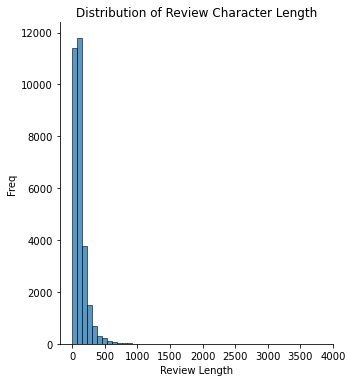

In [21]:
# visualising the data according to the 'Review' character length
char_len = [len(each_sent) for each_sent in df_Senti_Analysis['clean_text']]

sns.displot(char_len, kind='hist', bins=50)
plt.ylabel("Freq")
plt.xlabel("Review Length")
plt.title("Distribution of Review Character Length")
plt.show()

<AxesSubplot:>

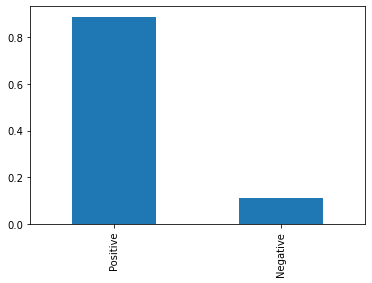

In [22]:
# checking sentiment column
df_Senti_Analysis.user_sentiment.value_counts(normalize=True).plot.bar()

- its very clear from the graph that data is highly imbalanced

<AxesSubplot:>

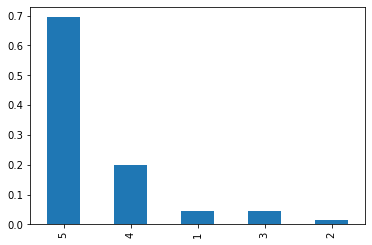

In [23]:
df_Senti_Analysis.reviews_rating.value_counts(normalize=True).plot.bar()

- we have more high rated reviews

In [26]:
# top 40 words by frequency among all the articles after processing the text
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

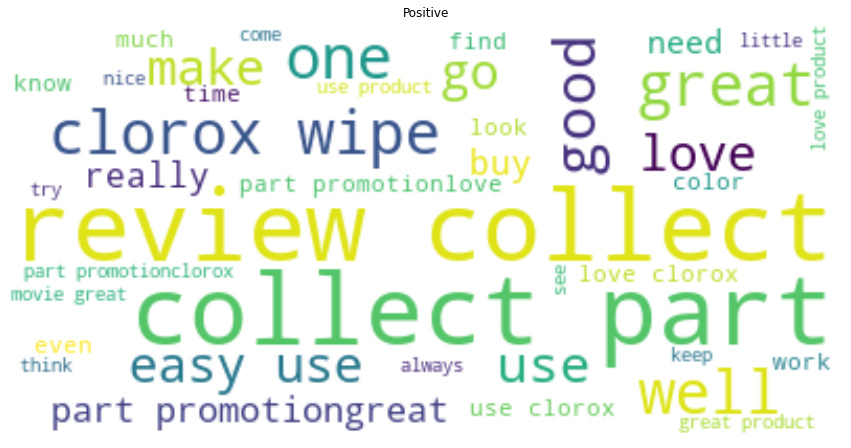

In [27]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text for positive reviews
stopwords = set(STOPWORDS)


positive_reviews=df_Senti_Analysis.loc[df_Senti_Analysis.user_sentiment=='Positive',['clean_text']]
word_cloud_text = ''.join(positive_reviews['clean_text'])
wordcloud = WordCloud( background_color="white",
                       max_font_size=60, 
                       max_words=40, 
                       random_state=100, 
                    stopwords=stopwords).generate(word_cloud_text)
plt.figure(figsize=[15,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Positive')
plt.show()

- positive review highlighted words - good, great,love,well

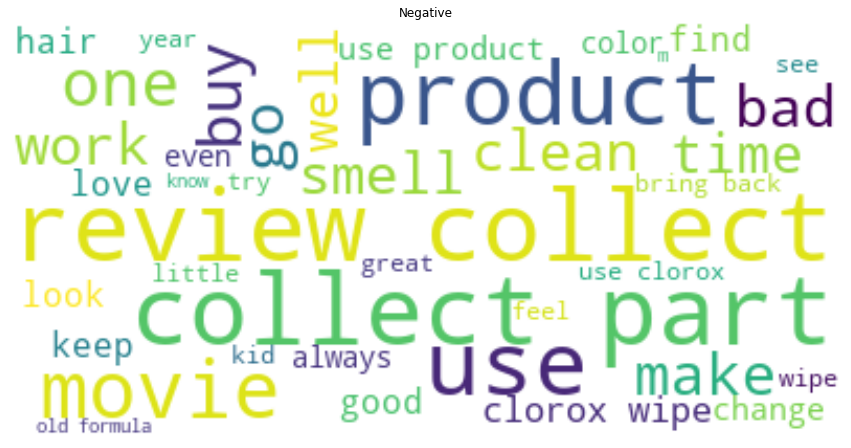

In [28]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stopwords = set(STOPWORDS)


negative_reviews=df_Senti_Analysis.loc[df_Senti_Analysis.user_sentiment=='Negative',['clean_text']]
word_cloud_text = ''.join(negative_reviews['clean_text'])
wordcloud = WordCloud( background_color="white",
                       max_font_size=60, 
                       max_words=40, 
                       random_state=100, 
                    stopwords=stopwords).generate(word_cloud_text)
plt.figure(figsize=[15,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Negative')
plt.show()

- Negative data is bit confusing but it contains articles like bad, smell etc

In [29]:
# create a new row to map positive sentiment as 1 and negative as 0 
df_Senti_Analysis['Sentiment_num'] = np.where(df_Senti_Analysis.user_sentiment == 'Positive',1,0)

C:\Users\dell\AppData\Local\Temp\ipykernel_12892\526211873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Senti_Analysis['Sentiment_num'] = np.where(df_Senti_Analysis.user_sentiment == 'Positive',1,0)


In [30]:
# checking the counts
df_Senti_Analysis['Sentiment_num'].value_counts()

1    26632
0     3367
Name: Sentiment_num, dtype: int64

In [31]:
df_Senti_Analysis.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...,0


#### Feature Extraction

In [32]:
#initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, tokenizer= word_tokenize, # type of tokenization
                               stop_words='english', # List of stopwords
                               ngram_range=(1,1))

In [33]:
#create the Document Term Matrix by transforming the complaints column present in df_Senti_Analysis.
dtm = tfidf.fit_transform(df_Senti_Analysis['clean_text'])
dtm

<29999x8479 sparse matrix of type '<class 'numpy.float64'>'
	with 416815 stored elements in Compressed Sparse Row format>

In [34]:
# Saving the vectorizer so that it can be used later while deploying the model

import pickle

# Save to file in the current working directory
pkl_filename = "Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

#### Model building

In [35]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dtm,df_Senti_Analysis['Sentiment_num'],test_size = 0.2,random_state = 0)

In [36]:
# import SMOTE module from imblearn library to solve the data imbalance issue
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#### 1. Logistic Regression Model

In [37]:
# Training after handling imbalance
from sklearn.linear_model import LogisticRegression
# creating model
lr = LogisticRegression().fit(X_train_res, y_train_res)


C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
predictions1 = lr.predict(X_test)

In [39]:
# Confusion matrix 
confusion = confusion_matrix(y_test, predictions1)
print(confusion)

[[ 526  129]
 [ 789 4556]]


In [40]:
lr.score(X_test,y_test)

0.847

In [41]:
print(classification_report(y_test, predictions1))
print("Accuracy : ",accuracy_score(y_test, predictions1))
print("F1 score: ",f1_score(y_test, predictions1))
print("Recall: ",recall_score(y_test, predictions1))
print("Precision: ",precision_score(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.40      0.80      0.53       655
           1       0.97      0.85      0.91      5345

    accuracy                           0.85      6000
   macro avg       0.69      0.83      0.72      6000
weighted avg       0.91      0.85      0.87      6000

Accuracy :  0.847
F1 score:  0.9084745762711864
Recall:  0.8523854069223573
Precision:  0.9724653148345784


### Findings
- Since the data was imbalanced its better to use the precision-Recall as the evaluation matrix and have a good result in LR.
tried hypertunning also but not much varaition in evaluation matrix

#### 2. Random Forest

In [42]:
# importing packages
from sklearn.ensemble import RandomForestClassifier

In [43]:
# fitting the basic model
rf = RandomForestClassifier().fit(X_train_res, y_train_res)

In [44]:
#Score of default model
rf.score(X_test, y_test)

0.8998333333333334

In [45]:
predictions2 = rf.predict(X_test)

In [46]:
# print classification report
print(classification_report(y_test, predictions2))
print("Accuracy : ",accuracy_score(y_test, predictions2))
print("F1 score: ",f1_score(y_test, predictions2))
print("Recall: ",recall_score(y_test, predictions2))
print("Precision: ",precision_score(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       655
           1       0.94      0.95      0.94      5345

    accuracy                           0.90      6000
   macro avg       0.74      0.73      0.73      6000
weighted avg       0.90      0.90      0.90      6000

Accuracy :  0.8998333333333334
F1 score:  0.9440253329607898
Recall:  0.9481758652946679
Precision:  0.9399109792284867


- precision and recall values are not good as Logistic regression so trying hyper parameter tuning

In [47]:
# setting hyper parameters
rf_param = {"n_estimators": [50, 100, 250],
           "max_depth": [5,10,15],
           "min_samples_split": [10,15,20],
           "min_samples_leaf": [5,10,15]}

In [48]:
# fitting model with hypermeters
from sklearn.model_selection import GridSearchCV
rf_tuned = GridSearchCV(estimator=rf,
                                param_grid=rf_param,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

rf_tuned.fit(X_train_res, y_train_res);

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [49]:
predictions3 = rf_tuned.predict(X_test)

In [50]:
# Confusion matrix 
confusion = confusion_matrix(y_test, predictions3)
print(confusion)

[[ 415  240]
 [ 817 4528]]


In [51]:
# print classification report
print(classification_report(y_test, predictions3))
print("Accuracy : ",accuracy_score(y_test, predictions3))
print("F1 score: ",f1_score(y_test, predictions3))
print("Recall: ",recall_score(y_test, predictions3))
print("Precision: ",precision_score(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.34      0.63      0.44       655
           1       0.95      0.85      0.90      5345

    accuracy                           0.82      6000
   macro avg       0.64      0.74      0.67      6000
weighted avg       0.88      0.82      0.85      6000

Accuracy :  0.8238333333333333
F1 score:  0.8954810639770593
Recall:  0.8471468662301216
Precision:  0.9496644295302014


- after parameter tuning also the precision-recall values are not good as Logistic regression

#### 3. Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

MNB=MultinomialNB()
MNB.fit(X_train_res,y_train_res)

MultinomialNB()

In [53]:
predicted4=MNB.predict(X_test)

confusion = confusion_matrix(y_test, predicted4)
print(confusion)

# print classification report
print(classification_report(y_test, predicted4))

print("Accuracy : ",accuracy_score(y_test, predicted4))
print("F1 score: ",f1_score(y_test, predicted4))
print("Recall: ",recall_score(y_test, predicted4))
print("Precision: ",precision_score(y_test, predicted4))

[[ 407  248]
 [ 898 4447]]
              precision    recall  f1-score   support

           0       0.31      0.62      0.42       655
           1       0.95      0.83      0.89      5345

    accuracy                           0.81      6000
   macro avg       0.63      0.73      0.65      6000
weighted avg       0.88      0.81      0.83      6000

Accuracy :  0.809
F1 score:  0.8858565737051793
Recall:  0.8319925163704397
Precision:  0.9471778487752929


### Findings
 among all the algorithm, Logistic regrssion is performing better. so we can store LR model.

In [54]:
# Saving the model as it will be used later while deploying
import pickle

# Save to file in the current working directory
pkl_filename = "Logistic_Reg_final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_model = pickle.load(file)

In [55]:
df_Senti_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  object
 1   brand                 29999 non-null  object
 2   categories            29999 non-null  object
 3   manufacturer          29858 non-null  object
 4   name                  29999 non-null  object
 5   reviews_date          29953 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27429 non-null  object
 8   reviews_rating        29999 non-null  int64 
 9   reviews_text          29999 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  169 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29999 non-null  object
 15  review_text_title     29999 non-null

In [56]:
df_Senti_Analysis.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14067
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28070
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
review_text_title           0
clean_text                  0
Sentiment_num               0
dtype: int64

# 2. Building a recommendation system

In [57]:
#dropping the rows where username is null
df_reco_sys=df_Senti_Analysis[~df_Senti_Analysis.reviews_username.isnull()]

In [58]:
# checking the shape of the dataframe
df_reco_sys.shape

(29936, 18)

In [59]:
# checking data
df_reco_sys.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...,0


#### Dividing the dataset into train and test

In [60]:
# Test and Train split of the dataset.
train, test = train_test_split(df_reco_sys, test_size=0.30, random_state=31)

In [61]:
# checking the shape of train and test set of data
print(train.shape)
print(test.shape)

(20955, 18)
(8981, 18)


In [62]:
# Pivot the train ratings' dataset into matrix format in which rows are user IDs and the columns are products
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
df_pivot.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# checking no of rows and columns
df_pivot.shape

(18224, 252)

#### Creating dummy train & dummy test dataset

In [64]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [65]:
# checking the unique values present in review rating column
df_reco_sys.reviews_rating.value_counts()

5    20791
4     6010
1     1373
3     1344
2      418
Name: reviews_rating, dtype: int64

In [66]:
# The products not rated by user is marked as 1 for prediction and rated products marked as 0.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [67]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [68]:
dummy_train.shape

(18224, 252)

### User Similarity Matrix

#### 1.Using Cosine Similarity

In [69]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [70]:
user_correlation.shape

(18224, 18224)

### Prediction - User User

In [71]:
# ignoring the correlation for values less than 0
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [72]:
#Rating predicted by the user is the weighted sum of correlation with the review rating
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 2.60896966,
        0.        ],
       [0.        , 0.        , 5.55592145, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 5.55592145, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.40689423, ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.40689423, ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.40689423, ..., 0.        , 0.        ,
        2.88675135]])

In [73]:
user_predicted_ratings.shape

(18224, 252)

In [74]:
#we need only the product not rated by the user, we will ignore the product rated by the user by making it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,12.551319,0.0,0.0,0.0,2.210643,0.000000,0.000000,...,0.0,2.738613,0.000000,0.0,0.0,2.371708,2.870614,0.0,2.60897,0.000000
01impala,0.0,0.0,5.555921,26.905605,0.0,0.0,0.0,0.000000,0.000000,1.766904,...,0.0,0.000000,1.555428,0.0,0.0,0.000000,3.764642,0.0,0.00000,0.000000
02dakota,0.0,0.0,5.555921,26.905605,0.0,0.0,0.0,0.000000,0.000000,1.766904,...,0.0,0.000000,1.555428,0.0,0.0,0.000000,3.764642,0.0,0.00000,0.000000
06stidriver,0.0,0.0,0.406894,17.912342,0.0,0.0,0.0,6.010227,3.535534,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,2.886751
08dallas,0.0,0.0,0.000000,0.445435,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000


In [75]:
user_final_rating.shape

(18224, 252)

### Finding the top 5 recommendation for the *user*

In [78]:
# Take the user id as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namerebecca
rebecca


In [79]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfJP1C1cnluZ0-e3Xy    595.104745
AVpfPaoqLJeJML435Xk9     95.648258
AVpe41TqilAPnD_xQH3d     43.950115
AVpe59io1cnluZ0-ZgDU     41.219218
AVpf0eb2LJeJML43EVSt     22.266095
Name: rebecca, dtype: float64

In [80]:
# mapping with product name
mapping=df_reco_sys[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [81]:
# Merging product id with mapping file to get the details of the recommended product
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,rebecca,name
0,AVpfJP1C1cnluZ0-e3Xy,595.104745,Clorox Disinfecting Bathroom Cleaner
1,AVpfPaoqLJeJML435Xk9,95.648258,Godzilla 3d Includes Digital Copy Ultraviolet ...
2,AVpe41TqilAPnD_xQH3d,43.950115,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe59io1cnluZ0-ZgDU,41.219218,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
4,AVpf0eb2LJeJML43EVSt,22.266095,The Resident Evil Collection 5 Discs (blu-Ray)


### Evaluation - User User

In [82]:
# Find out the common users of test and train dataset
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2022, 18)

In [83]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
10481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-27T00:00:00.000Z,False,True,5,I stock up on these because they are my favori...,Quick and Clean,NaN,NaN,debster,Positive,Quick and Clean I stock up on these because th...,quick clean stock favorite goto quick cleanup ...,1
19701,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-30T00:00:00.000Z,False,True,5,I love Clorox wipes!!! I have 3 small kids and...,Love the Clean smell,NaN,NaN,laura30,Positive,Love the Clean smell I love Clorox wipes!!! I ...,love clean smell love clorox wipe small kid wo...,1
20083,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,False,True,5,I use Clorox Disinfecting Wipes on all surface...,Versatile,NaN,NaN,suzweet,Positive,Versatile I use Clorox Disinfecting Wipes on a...,versatile use clorox disinfecting wipe surface...,1
19708,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2015-08-20T00:00:00.000Z,False,True,5,I USE THESE WIPES ALL THE TIME! THEY ARE GREAT...,LOVE IT!!!,NaN,NaN,krotz03,Positive,LOVE IT!!! I USE THESE WIPES ALL THE TIME! THE...,love use wipe time great disinfect anywhere ho...,1
29188,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-09T00:00:00.000Z,False,True,4,I received this free from Influenster for test...,Normal,NaN,NaN,toshcal,Positive,Normal I received this free from Influenster f...,normal receive free influenster testing condit...,1


In [84]:
# convert into the user-product matrix
common_user_based_matrix = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aac06002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Convert the user_correlation matrix into dataframe
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223
0,1.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
user_correlation_df['reviews_username'] = df_pivot.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
08dallas,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
10481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-27T00:00:00.000Z,False,True,5,I stock up on these because they are my favori...,Quick and Clean,NaN,NaN,debster,Positive,Quick and Clean I stock up on these because th...,quick clean stock favorite goto quick cleanup ...,1


In [88]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [89]:
user_correlation_df_1.shape

(1708, 18224)

In [90]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [91]:
user_correlation_df_3 = user_correlation_df_2.T

In [92]:
user_correlation_df_3.shape

(1708, 1708)

In [93]:
user_correlation_df_3.head()

,1234,1234asdf,37f5p,4cloroxl,aac06002,aaron,abbi,abcgator,abigail,abismomy,...,yeya,ygtz,yoadrian,yohnie1,yshan,zapman,zburt5,zebras,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.671627,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.529813,0.0,0.0,0.0,0.0,0.0,0.0,0.662266
1234asdf,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37f5p,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4cloroxl,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.707107,...,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
aac06002,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [94]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[3.64230241, 3.84370381, 0.        , ..., 2.03798328, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.46182982, 5.        ,
        0.        ],
       [0.        , 1.74077656, 1.58943883, ..., 0.        , 0.        ,
        0.        ],
       [5.        , 2.82842712, 0.        , ..., 3.07728727, 0.        ,
        0.        ]])

In [95]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(0)
dummy_test.shape

(1708, 130)

In [96]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [97]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aac06002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculating the RMSE for only the movies rated by user

In [98]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [99]:
common_ = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

In [100]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [101]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1287776458217484


### Item Based recommendation system

In [102]:
# taking the transpose
df_pivot = train.pivot_table(
   index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zowie,zozo0o,zpalma,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Finding the cosine similarity using pairwise distances approach
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [104]:
# Filtering the correlation only for which the value is great
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [105]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.11860483,
        0.        ],
       [0.        , 0.        , 0.04933016, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08221693, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00486692, ..., 0.        , 0.        ,
        0.02522442],
       [0.        , 0.        , 0.00486692, ..., 0.        , 0.        ,
        0.02522442],
       [0.        , 0.        , 0.00389354, ..., 0.        , 0.        ,
        0.02017954]])

In [106]:
item_predicted_ratings.shape

(18224, 252)

In [107]:
dummy_train.shape

(18224, 252)

In [108]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.065120,0.0,0.0,0.0,0.026462,0.00000,0.000000,...,0.0,0.048836,0.000000,0.0,0.0,0.079474,0.019304,0.0,0.118605,0.000000
01impala,0.0,0.0,0.049330,0.053117,0.0,0.0,0.0,0.000000,0.00000,0.011950,...,0.0,0.000000,0.018075,0.0,0.0,0.000000,0.010025,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.082217,0.088529,0.0,0.0,0.0,0.000000,0.00000,0.019917,...,0.0,0.000000,0.030125,0.0,0.0,0.000000,0.016709,0.0,0.000000,0.000000
06stidriver,0.0,0.0,0.004867,0.031220,0.0,0.0,0.0,0.018108,0.01536,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.025224
08dallas,0.0,0.0,0.000000,0.008360,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


#### Finding the top 5 recommendation for the user

In [113]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namerebecca
rebecca


In [114]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfJP1C1cnluZ0-e3Xy    0.847945
AVpfOfIqLJeJML435D06    0.846165
AVpfUJu_ilAPnD_xZdDr    0.695545
AVpfMpZ51cnluZ0-f_L9    0.520904
AVpe59io1cnluZ0-ZgDU    0.432087
Name: rebecca, dtype: float64

In [115]:
# #Mapping with product name
mapping= df_reco_sys[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [116]:
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,rebecca,name
0,AVpfJP1C1cnluZ0-e3Xy,0.847945,Clorox Disinfecting Bathroom Cleaner
1,AVpfOfIqLJeJML435D06,0.846165,Solo Foods Poppy Seed Cake and Pastry Filling
2,AVpfUJu_ilAPnD_xZdDr,0.695545,Chobani174 Strawberry On The Bottom Non-Fat Gr...
3,AVpfMpZ51cnluZ0-f_L9,0.520904,Chips Ahoy! Original Chocolate Chip - Cookies ...
4,AVpe59io1cnluZ0-ZgDU,0.432087,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


#### Evaluation - Item Ite

In [117]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment',
       'review_text_title', 'clean_text', 'Sentiment_num'],
      dtype='object')

In [118]:
common = test[test.id.isin(train.id)]
common.shape

(8955, 18)

In [119]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
26716,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2015-07-08T00:00:00.000Z,NaN,NaN,5,A good lotion for my daughter.,Five Stars,NaN,NaN,byluckyiyu,Positive,Five Stars A good lotion for my daughter.,five star good lotion daughter,1
11689,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-04-11T00:00:00.000Z,False,True,5,Keeps my house from being a lab/hospital. Brin...,Never had problems after,NaN,NaN,sdurunna,Negative,Never had problems after Keeps my house from b...,never problem keep house labhospital bring bab...,0
18300,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",South Shore,Bilbao Nightstand Gray Oak - South Shore,2014-12-03T00:00:00Z,NaN,NaN,5,"Needed a nightstand for my girlfriend, all the...",Beautiful!,NaN,NaN,javier,Positive,Beautiful! Needed a nightstand for my girlfrie...,beautiful need nightstand girlfriend one terri...,1
25410,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-10-19T00:00:00.000Z,NaN,True,5,Shockingly a really great film. The acting as ...,shocking,NaN,NaN,dbztimmy,Positive,shocking Shockingly a really great film. The a...,shock shockingly really great film act well ar...,1
10481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-27T00:00:00.000Z,False,True,5,I stock up on these because they are my favori...,Quick and Clean,NaN,NaN,debster,Positive,Quick and Clean I stock up on these because th...,quick clean stock favorite goto quick cleanup ...,1


In [120]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [121]:
common_item_based_matrix.shape

(197, 8377)

In [122]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006082,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [123]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006082,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [124]:
list_name = common.id.tolist()

In [125]:
item_correlation_df.columns = df_pivot.index.tolist()

In [126]:
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [127]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

In [128]:
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.019514,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01789,0.0,...,0.0,0.0,0.001669,0.0,0.0,0.0,0.0,0.0,0.006082,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [129]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.06577355, 0.00486692, ..., 0.        , 0.00194677,
        0.        ],
       [0.08244513, 0.07082314, 0.03122041, ..., 0.07462487, 0.01248816,
        0.07946205],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13245721],
       [0.        , 0.0133671 , 0.        , ..., 0.        , 0.        ,
        0.02043058],
       [0.        , 0.        , 0.02522442, ..., 0.        , 0.01008977,
        0.        ]])

In [130]:
common_item_predicted_ratings.shape

(197, 8377)

In [131]:
# To evaluate, we will only make prediction on the movies rated by the user
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [132]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [133]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [134]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [135]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5711727090737755


### Findings
- from the above two evaluation its clear that User based recommendation system as low RMSE. so we are going to implement User based recommendation system in our project

#### Task 
 - Recommend 20 products that a user is most likely to purchase based on the ratings

In [139]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namerebecca
rebecca


In [140]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
mapping= df_reco_sys[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
recommendations = pd.merge(recommendations,mapping, left_on='id', right_on='id', how = 'left')
recommendations

,id,rebecca,name
0,AVpfJP1C1cnluZ0-e3Xy,595.104745,Clorox Disinfecting Bathroom Cleaner
1,AVpfPaoqLJeJML435Xk9,95.648258,Godzilla 3d Includes Digital Copy Ultraviolet ...
2,AVpe41TqilAPnD_xQH3d,43.950115,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe59io1cnluZ0-ZgDU,41.219218,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
4,AVpf0eb2LJeJML43EVSt,22.266095,The Resident Evil Collection 5 Discs (blu-Ray)
5,AVpf2tw1ilAPnD_xjflC,18.294867,Red (special Edition) (dvdvideo)
6,AV1YGDqsGV-KLJ3adc-O,16.318922,Windex Original Glass Cleaner Refill 67.6oz (2...
7,AVpf5olc1cnluZ0-tPrO,15.542191,Chester's Cheese Flavored Puffcorn Snacks
8,AVpf63aJLJeJML43F__Q,14.878773,"Burt's Bees Lip Shimmer, Raisin"
9,AVpf0thK1cnluZ0-r8vR,13.538218,100:Complete First Season (blu-Ray)


In [141]:
import pickle

user_final_rating.to_pickle("user_final_rating.pkl")
pickled_user_final_rating = pd.read_pickle("user_final_rating.pkl")
pickled_user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.000000,0.0,0.000000,12.551319,0.0,0.0,0.0,2.210643,0.000000,0.000000,...,0.0,2.738613,0.000000,0.0,0.0,2.371708,2.870614,0.0,2.60897,0.000000
01impala,0.000000,0.0,5.555921,26.905605,0.0,0.0,0.0,0.000000,0.000000,1.766904,...,0.0,0.000000,1.555428,0.0,0.0,0.000000,3.764642,0.0,0.00000,0.000000
02dakota,0.000000,0.0,5.555921,26.905605,0.0,0.0,0.0,0.000000,0.000000,1.766904,...,0.0,0.000000,1.555428,0.0,0.0,0.000000,3.764642,0.0,0.00000,0.000000
06stidriver,0.000000,0.0,0.406894,17.912342,0.0,0.0,0.0,6.010227,3.535534,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,2.886751
08dallas,0.000000,0.0,0.000000,0.445435,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,2.828427,0.0,0.000000,12.239801,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000
zwithanx,0.000000,0.0,0.406894,17.912342,0.0,0.0,0.0,6.010227,3.535534,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,2.886751
zxcsdfd,0.000000,0.0,0.406894,17.912342,0.0,0.0,0.0,6.010227,3.535534,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,2.886751


In [142]:
# Save to file in the current working directory

mapping.to_pickle("prod_id_name_mapping.pkl")
pickled_mapping = pd.read_pickle("prod_id_name_mapping.pkl")
pickled_mapping

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
...,...,...
28769,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
28772,AVpfvieo1cnluZ0-qdnu,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...
28795,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
28799,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [143]:
# Save to file in the current working directory

df_Senti_Analysis.to_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data = pd.read_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text_title,clean_text,Sentiment_num
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive,Softness!! I got this conditioner with Influen...,softness get conditioner influenster try I m l...,1
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive,"I love it I love it , I received this for revi...",love love receive review purpose influenster l...,1
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive,Hair is so smooth after use First of all I lov...,hair smooth use first love smell product wash ...,1
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive,Perfect for my oily hair! I received this thro...,perfect oily hair receive influenster never go...,1


# 3. Improving the recommendations using the sentiment analysis model

-the next task is to link this recommendation system with the sentiment analysis model that was built earlier

In [144]:
# merging datasets
improved_reco_sys= pd.merge(recommendations,pickled_reviews_data[['id','clean_text']], left_on='id', right_on='id', how = 'left')

In [145]:
test_data_for_user = pickled_tfidf_vectorizer.transform(improved_reco_sys['clean_text'])
sentiment_prediction_for_user= pickled_model.predict(test_data_for_user)

In [146]:
# predicting sentiment of recommended product
sentiment_prediction_for_user = pd.DataFrame(sentiment_prediction_for_user, columns=['Predicted_Sentiment'])
improved_reco_sys= pd.concat([improved_reco_sys, sentiment_prediction_for_user], axis=1)

In [147]:
# calculating the percentage of positive sentiments 
a=improved_reco_sys.groupby('id')
b=pd.DataFrame(a['Predicted_Sentiment'].count()).reset_index()

In [148]:
b.columns = ['id', 'Total_reviews']
c=pd.DataFrame(a['Predicted_Sentiment'].sum()).reset_index()
c.columns = ['id', 'Total_predicted_positive_reviews']

In [149]:
improved_reco_sys_final=pd.merge( b, c, left_on='id', right_on='id', how='left')
improved_reco_sys_final['Positive_sentiment_rate'] = improved_reco_sys_final['Total_predicted_positive_reviews'].div(improved_reco_sys_final['Total_reviews']).replace(np.inf, 0)
improved_reco_sys_final= improved_reco_sys_final.sort_values(by=['Positive_sentiment_rate'], ascending=False )
improved_reco_sys_final=pd.merge(improved_reco_sys_final, pickled_mapping, left_on='id', right_on='id', how='left')

In [150]:
# top high recommendation with highest positive review
improved_reco_sys_final.head(5)

,id,Total_reviews,Total_predicted_positive_reviews,Positive_sentiment_rate,name
0,AVpf2tw1ilAPnD_xjflC,672,618,0.919643,Red (special Edition) (dvdvideo)
1,AVpe59io1cnluZ0-ZgDU,668,607,0.908683,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
2,AVpfPnrU1cnluZ0-g9rL,186,164,0.881720,Stargate (ws) (ultimate Edition) (director's C...
3,AVpe9W4D1cnluZ0-avf0,362,317,0.875691,Hoover174 Platinum Collection153 Lightweight B...
4,AVpf0thK1cnluZ0-r8vR,139,120,0.863309,100:Complete First Season (blu-Ray)


# 4.Deploying the end-to-end project with a user interface

In [151]:
## Git HUB Link
##        https://github.com/Tusharkaushik0405/sentiment_system.git
            

SyntaxError: invalid syntax (2560979977.py, line 1)

In [ ]:
# heroku link
## https://productrecommendersystem.herokuapp.com/